<a href="https://colab.research.google.com/github/hillerj1/PHY_310/blob/main/Bifurcation_Bisection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: The Logistic Map and Root Finders

## Place All Library Imports in This Section

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random

# The Logistic Map

## The Basic Map

### The Function Itself

<font color = blue>
    
Start by creating a function of two variables `a` and `x`, which outputs the function $F_a(x) = ax(1-x)$.

In [ ]:
# Function applies logistic map to two inputed variables a and x
# a is bound [0,4]
# x is bound [0,1]
def F(a,x):
    'Equation for the logistic map'
    return (a*x)*(1-x)

F(2,.5)

0.5

### The Map Function: Version 1

<font color = blue>
    
Now create a function that takes three inputs: an intial value `x_0`, a parameter `a`, and an integer `map_count` = m, and outputs an array of `map_count` + 1 values $\{x_0, x_1, x_2, \dots, x_m\}$, where

$$
x_{k+1} = F_a(x_k)
$$

Do this starting with a list of just one element, for example `mapping_array = np.array([x0])`.  Then use a `for` loop to sequentially create the later values of $x_k$, and append each to the array `mapping_array`.

To do this, you may want to look up the `numpy` function `append`.

Confirm that your code is working by generating an array of 5 elements using the initial value `x_0` = 0.5, with `a` = 0.5, and `map_count` = 5.  Your output should be

$$
\{0.5, 0.125, 0.0546875, 0.0258484, 0.0125901, 0.0062158\}
$$

In [ ]:
# creates a array of iteration values for the logistic map equation
def map(x0, a, m):
    'appends values to an array using a for loop'
    map_count = m
    mapping_array = np.array([x0])

    for x in range(map_count):
        x = x0
        x0 = F(a,x)
        mapping_array = np.append(mapping_array, x0)

    return mapping_array

print(map(.5, .5, 5))

[0.5        0.125      0.0546875  0.02584839 0.01259012 0.00621581]


### The Map Function: Version 2

<font color = blue>
    
Now create a second version of the same function.  This time, instead of starting with a list that has a single element, start by creating a list with `map_count` + 1 elements, each of which is equal to `x_0`.  Then, inside your `for` loop, sequentially replace the elements of this list with the values $x_k$ which are computed.  Again confirm that your code works as desired.

In [ ]:
# creates a array of iteration values for the logistic map equation
def map2(x0, a, m):
    'instead of appending to an array of values, this for loop replaces values in the original array of zeros'
    map_count = m + 1
    mapping_array = np.full(map_count, x0)

    for i in range(map_count):
        mapping_array[i] = x0
        x0 = F(a, mapping_array[i])

    return mapping_array

print(map2(.5, .5, 5))

[0.5        0.125      0.0546875  0.02584839 0.01259012 0.00621581]


### Efficiency and Timing

<font color = blue>
    
We want to compare the efficiency of the two functions we have just created.  In order to do this, generate lists of how long it takes to run each function (using the `time` function from the `time` module you explored last time), with `x_0` = 0.5 and `a` = 0.5, and `mapping_count` $= \{1000, 2000, 3000, \dots, 50000\}$.  

Create a single graph comparing each of these time lists, and **discuss** what you have learned.

In the rest of the assignment, use the more efficient of your two functions!

[0.001647   0.00210214 0.00332284 0.0045712  0.00576091 0.00738597
 0.00934196 0.01155877 0.01403809 0.0167737 ]
[0.0001688  0.00030684 0.00044227 0.00061607 0.00072598 0.00085306
 0.00100303 0.00114083 0.00131202 0.00142002]


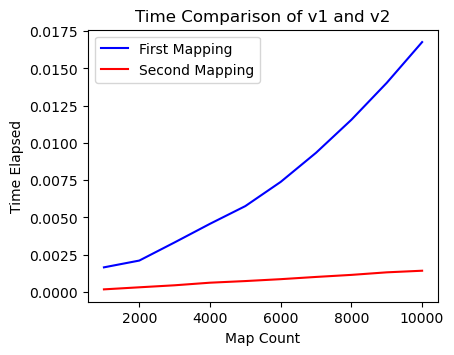

In [ ]:
# assigning variables to check the speed of each map function and which is more efficient
mapping_count = np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
elapsed_time1 = np.array([])
elapsed_time2 = np.array([])

# For loop runs each program for each count 1000-10000
for i in mapping_count:
    start_time1 = time.time()
    map(.5, .5, i)
    end_time1 = time.time()
    elapsed_time_new1 = end_time1 - start_time1
    elapsed_time1 = np.append(elapsed_time1, elapsed_time_new1)

    start_time2 = time.time()
    map2(.5, .5, i)
    end_time2 = time.time()
    elapsed_time_new2 = end_time2 - start_time2
    elapsed_time2 = np.append(elapsed_time2, elapsed_time_new2)

print(elapsed_time1)
print(elapsed_time2)

# Plots a graph showing the map count vs. time in order to test which function is more effiecient for longer data sets with more iterations
fig, ax = plt.subplots(figsize=(5, 4))
fig.subplots_adjust(bottom=0.20, left=0.2)
ax.set_title('Time Comparison of v1 and v2')
ax.set_xlabel('Map Count')
ax.set_ylabel('Time Elapsed')
ax.plot(mapping_count, elapsed_time1, color = 'blue', label = 'First Mapping')
ax.plot(mapping_count, elapsed_time2, color = 'red', label = 'Second Mapping',)
ax.legend()
plt.show()

The graph above very clearly shows that the second version of the map function is much more efficient. For the first version as the map_count value gets larger the time it takes to solve increases exponentially. As apposed to the second version in which the time increases linearly. Therefore allowing me to solve much more complex numerical problems.  

## Convergence Behaviors

### Fixed Points

<font color = blue>
    
Now you want to confirm that $x_0 = 0$ and $x_0 = \frac{a - 1}{a}$ are fixed points of the logistic map.  Do this by generating arrays with `map_count` = 10 that start at these points, and showing they stay the same.  Do this for the values of a:

$$
a = \{0.5, 1.5, 2.5, 3.5\}
$$

(For $a = 0.5$, you only need to check $x_0 = 0$, as the other is not considered a fixed point unless $a \ge 1$.)

In [ ]:
# Simply checking if all of the values are the same and if the functions work properly by confirming the fixed point stabilities.
print('a=.5')
print(map2(0,.5,10))
print('a=1.5')
print(map2(0,1.5,10))
print(map2((1.5-1)/1.5, 1.5,10))
print('a=2.5')
print(map2(0,2.5,10))
print(map2((2.5-1)/2.5, 2.5,10))
print('a=3.5')
print(map2(0,3.5,10))
print(map2((3.5-1)/3.5, 3.5,10))

a=.5
[0 0 0 0 0 0 0 0 0 0 0]
a=1.5
[0 0 0 0 0 0 0 0 0 0 0]
[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
a=2.5
[0 0 0 0 0 0 0 0 0 0 0]
[0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
a=3.5
[0 0 0 0 0 0 0 0 0 0 0]
[0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571
 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571]


### x = 0 Fixed Point Stability

<font color = blue>
    
Confirm that when $a < 1$, an arbitrarily chosen initial point will quickly converge to zero.  The easiest way to see this is by plotting the results.  Create a graph showing two lists of points for `map_count` = 100, starting at two different initial values $x_0$, with two different values $0 < a < 1$.  **Discuss** the results.

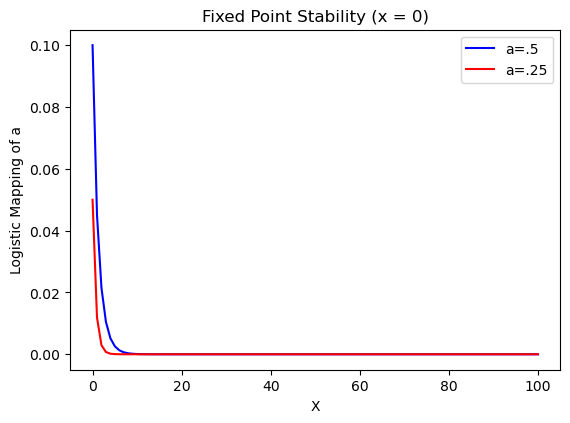

In [ ]:
# checks values from 0 to 1 to determine the fixed points
one_vals = map2(.1, .5, 100)
two_vals = map2(.05, .25, 100)
x_vals = np.linspace(0,100,101)

# Graphing to show that all a values from 0 to 1 stabilize at zero
fig, ax = plt.subplots(figsize=(7, 5))
fig.subplots_adjust(bottom=0.20, left=0.2)
ax.set_title('Fixed Point Stability (x = 0)')
ax.set_xlabel('X')
ax.set_ylabel('Logistic Mapping of a')

ax.plot(x_vals, one_vals, color = 'blue', label = 'a=.5')
ax.plot(x_vals, two_vals, color = 'red', label = 'a=.25',)
ax.legend()
plt.show()

The graph above shows very clearly that the value x = 0 is a fixed point (obviously), no matter the value of a [0,1] the map will return to 0 rather quickly. In broader terms this shows that the function will not continue for long after the initial value of x0.

### ${\pmb x = \frac{a - 1}{a}}$ Fixed Point Stability

<font color = blue>
    
Now do the same for the region $1 < a < 3$, showing that arbitrarily chosen initial values converge to the second fixed point $\frac{a - 1}{a}$.  Choose two values of $a$, one of which has $1 < a < 2$ and the other of which has $2 < a < 3$, and two arbitrary values of $x_0$.  For each value of $a$, compute what the theoretical fixed point should be, and display that on your plot as a horizontal line (so you can confirm the convergence more readily.)  Again, **discuss** your results.

0.03
0.096


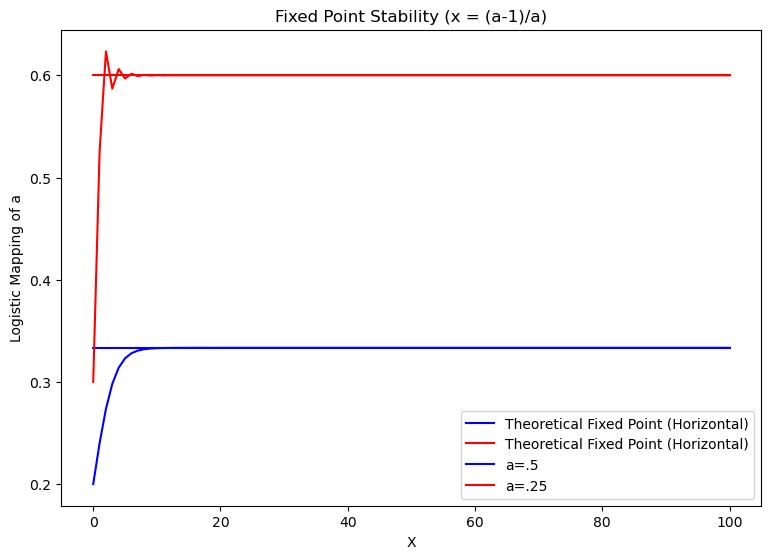

In [ ]:
# Checking the fixed points using a more analytical method.
one_vals = map2(.2, 1.5, 100)
two_vals = map2(.3, 2.5, 100)
x_vals = np.linspace(0,100,101)

fixed_1 = np.array(np.full(101, (1.5-1)/1.5))
fixed_2 = np.array(np.full(101, (2.5-1)/2.5))
print(F((1.5-1)/1.5, .1))
print(F((2.5-1)/2.5, .2))

# Plotting the arrays in terms of the horizontal lines at the fixed points.
# No matter the random x0 value, the red and blue lines should both stabilize at the fixed horizontal lines.
fig, ax = plt.subplots(figsize=(10, 7))
fig.subplots_adjust(bottom=0.20, left=0.2)
ax.set_title('Fixed Point Stability (x = (a-1)/a)')
ax.set_xlabel('X')
ax.set_ylabel('Logistic Mapping of a')
ax.plot(x_vals, fixed_1, color = 'blue', label = 'Theoretical Fixed Point (Horizontal)')
ax.plot(x_vals, fixed_2, color = 'red', label = 'Theoretical Fixed Point (Horizontal)',)
ax.plot(x_vals, one_vals, color = 'blue', label = 'a=.5')
ax.plot(x_vals, two_vals, color = 'red', label = 'a=.25',)
ax.legend()
plt.show()

This graph shows that from a values 1 to 3, the bifurcation closes in on a fixed point, no matter the value of x0. This is interesting because it shows how the initial value does not have any impact on the outcome of the equation over several iterations.

### Period 2 Convergence

<font color = blue>
    
Now pick a value of $a$ in the region $3 < a < 1 + \sqrt{6}$, along with an arbitrary initial value $x_0$.  For this value of $a$, determine (theoretically) what the fixed points of $F_a^{(2)}(x)$ should be.  Plot these values as horizontal lines together with the series that results from your chosen initial value.  **Discuss** the results.

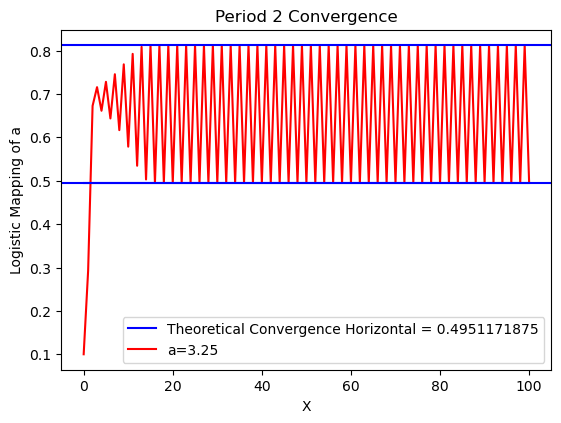

In [ ]:
# assigning a to a value between 3 and 1+sqrt(6)
a = 3.25
F_2 = np.array(np.full(101, F(a,F(a,.5))))
per_2 = np.array(map2(.1, a, 100))

# Plot lets us observe the period 2 convergence and fixed points associated with the certain a value between the two parameters.
fig, ax = plt.subplots(figsize=(7, 5))
fig.subplots_adjust(bottom=0.20, left=0.2)
ax.set_title('Period 2 Convergence')
ax.set_xlabel('X')
ax.set_ylabel('Logistic Mapping of a')
ax.plot(x_vals, F_2, color = 'blue', label = f'Theoretical Convergence Horizontal = {F(a,F(a,.5))}')
ax.plot(x_vals, per_2, color = 'red', label = 'a=3.25',)
plt.axhline(y = F(a, F(a, 0.5)) , color = 'b', linestyle = '-')
plt.axhline(y = F(a, .5) , color = 'b', linestyle = '-')
ax.legend()
plt.show()

The graph above shows that from a value 3 to 1+sqrt(6) a period doubling occurs. This is an interesting phenomena since even though the x0 value does not matter, the specific a value impacts the period of the bifurcation pattern.

### Period 4 Convergence

<font color = blue>
    
Now pick a value of $a$ in the range $1 + \sqrt{6} < a < 3.5441$, and show (by producing a graph) that after a large number of mappings we essentially cycle through four different values.  Take your list out to `map_count` = 300 (so that convergence behavior is easier to see.)  This time, for your particular value of $a$, determine what these four limiting values are "experimentally" (and include them as horizontal lines in your graph) -- and explain your process in a **discussion**.

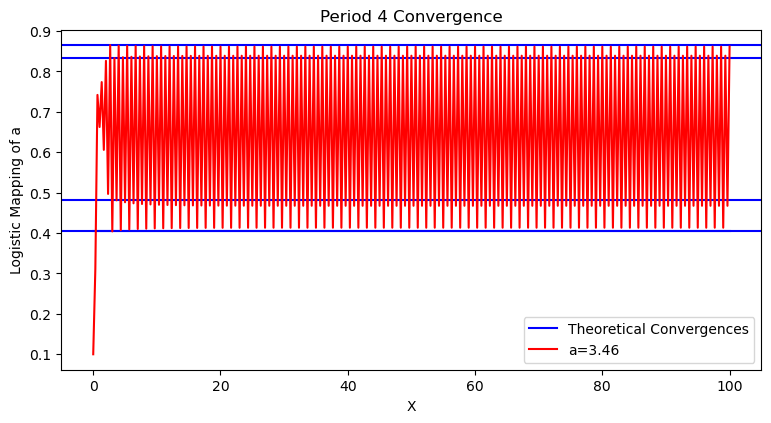

Converence 1: 0.865
Converence 2: 0.40404150000000005
Converence 3: 0.833140203321015
Converence 4: 0.4810009130620654


In [ ]:
# Period 4 convergence happens between 1+sqrt(6) and 3.5441
a = 3.46
F_2 = np.array(np.full(301, F(a,F(a,.5))))
per_2 = np.array(map2(.1, a, 300))
x_vals = np.linspace(0,100,301)
con_1 = F(a, .5)
con_2 = F(a, con_1)
con_3 = F(a, con_2)
con_4 = F(a, con_3)

# After plotting we can observe the period 4 convergence on a graph and the fixed points associated with the stabitily of the equation.
fig, ax = plt.subplots(figsize=(10, 5))
fig.subplots_adjust(bottom=0.20, left=0.2)
ax.set_title('Period 4 Convergence')
ax.set_xlabel('X')
ax.set_ylabel('Logistic Mapping of a')
ax.plot(x_vals, F_2, color = 'blue', label = f'Theoretical Convergences')
plt.axhline(y = con_1, color = 'b', linestyle = '-')
plt.axhline(y = con_2, color = 'b', linestyle = '-')
plt.axhline(y = con_3, color = 'b', linestyle = '-')
plt.axhline(y = con_4, color = 'b', linestyle = '-')


ax.plot(x_vals, per_2, color = 'red', label = 'a=3.46',)
ax.legend()
plt.show()
print(f'Converence 1: {con_1}')
print(f'Converence 2: {con_2}')
print(f'Converence 3: {con_3}')
print(f'Converence 4: {con_4}')
# NOT THEORITICAL (NUMERIC)

Above I plotted the period 4 bifurcation as a increased to a value between 1+sqrt(6) and 3.5541. After I plotted the red lines showing the period 4 graph, I used the original F() function to calculate the theoretical values of the 4 convergence points. Convergence 1 is just F(), con_2 is F(F()), con_3 is F(F(F())), and con_4 is F(F(F(F()))). After plotting the theoretical values as horizontal lines on the graph, it seems as though they look correct. Once the red line hits a line it bounces back to the next and so forth.

### Finding the Next Bifurcation Point

```
```

<font color = blue>
    
Come up with, and implement, a process to approximate the next "bifurcation point": the value of $a$ at which period 4 converge turns into period 8 convergence.  (Hint: to get good results you may want to increase the value of `map_count` that you use).

Then, create a graph that displays the first three bifurcation points $[a_0 = 3, a_1 = 1 + \sqrt{6}, a_2]$, along with a horizontal line at the limiting value $a_{\infty} \approx 3.5699456$.

**Discuss** both your results and the method you used to get them.

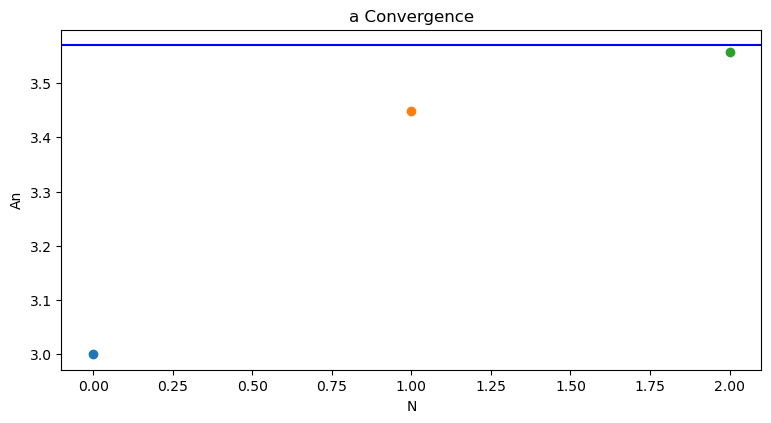

In [ ]:
# Simple graph that shows how the different a values eventually lead to a_infinity where all goes to chaos.
a0 = 3
a1 = 1+np.sqrt(6)
a2 = np.random.uniform(3.5541, 3.55699456)
a_inf = 3.5699456

fig, ax = plt.subplots(figsize=(10, 5))
fig.subplots_adjust(bottom=0.20, left=0.2)
ax.set_title('a Convergence')
ax.set_xlabel('N')
ax.set_ylabel('An')
plt.axhline(y = a_inf, color = 'b', linestyle = '-')
plt.scatter(0, a0)
plt.scatter(1, a1)
plt.scatter(2, a2)

The graph above shows very simply how the a values from 0 to 3 increase until the a_inf value. At a_inf the bifuractions and period go to chaos. But under the blue line this is order.

## Building a Bifurcation Diagram

### The Map Function: Version 3

<font color = blue>
We now want to actually create the bifurcation diagram.  However, to do so efficiently we need to go back to our original mapping function, and modify it.  

First, we want the output of the function to be just the final result of the mapping, $x_N$ where $N = $`map_count`.  And since we need only this last element, there's no reason to keep track of the entire array as we go (and leaving this out makes things much more efficient.)

<font color = blue>
    
Second, instead of the user specifying the initial point $x_0$, we want the function to generate a random initial point in the range $[0, 1]$, automatically.  (To do this you will need to use the `random` module, with the function `uniform`).

Create your final version of the mapping function, and test it out to be sure it's working properly.

In [ ]:
# mapv3 is a different type of mappying function which just takes the last value from the iterations
def mapv3(a, n):
    x0 = random.uniform(0,1)
    map_count = n + 1
    mapping_array = 0

    for i in range(map_count):
        mapping_array = x0
        x0 = F(a, mapping_array)

    return mapping_array

mapv3(.5, 5)

0.0054676078434712635

### A Data Generating Function

<font color = blue>
    
Now we want to create the function that will actually generate our data.  This function will take two inputs: the total number of data points `data_count`, and the number of mappings `map_count` we will use to generate each data point.  

Inside the function, begin by generating two arrays of `data_count` elements, each of which zero.  (One will hold your values of $a$ and the other will hold the outputs of your mapping.)

Then, inside a loop that runs `data_count` times, generate a random value for $a$ in the range $[0, 4]$, use that value of $a$ and the function from the previous section to generate a final point from the mapping.  Finally, replace the next element of each of your arrays with those values.

After the loop is complete, return both arrays.

Confirm your code works as desired.

In [ ]:
# generating data is just using the data count (# of data points) and the map_count (# of iterations of the logistic equation)
def gen(data_count, map_count):
    data_count_a = np.array([])
    data_count_out = np.array([])
# For loop appends the data to an empty array in order to plot it in a further section.
    for i in range(data_count):
        a = random.uniform(0,4)
        data_count_a = np.append(data_count_a, a)
        data_count_out = np.append(data_count_out, mapv3(a, map_count))

    return data_count_a, data_count_out

### Estimating Time

```
```

<font color = blue>
    
Before you generate the data you will use to actually create your diagram, you want to have a sense for how much computational time that data set will require.

Set a "target time" (a goal for how much computational time you are willing to devote to generating your data).

Using modest values for the parameters `data_count` and `map_count` to run trials, work out how large you can afford to make the parameters.  (If you're doing this correctly, the trials should use substantially smaller values than the ones you will eventually implement)

**Discuss** both your method and your results.

In [ ]:
# For loops lets me check the time it takes to run gen() a certain amount of time.
# I then decide how long I am willing to wait for accurate and good looking data.
target_time = 300 #seconds
elapsed_time = 0
for i in range(2):
    n = 100000
    start_time = time.time()
    gen(n, 1000)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(elapsed_time)
    #n = n + 500

#gen(1000000, 1000) is my final

6.235008955001831
6.257137775421143


At first I ran a if statement inside a for loop that continued to run the loop until the elapsed_time was geting close or equal to the target_time. I set the target time to 5 minutes. I only hit that time once but it felt a lot longer so I continued to run the loop with smaller values. After running it a few times only within a range of 2, I found that I will probably run the program with 1,000,000 data points, with 1000 iterations each. I suspect that this will probably take a while but I am willing to wait for it.

### * The Bifurcation Diagram

<font color = blue>
    
You now want to actually generate (and **discuss**) the bifurcation diagram.  Collect your data, and display it on a graph.  

**Some sections of each assignment will be marked with an asterisk (as this one is.)  These sections are considered "results" sections.  In them, make sure that all graphs are labeled carefully, and discussions are thorough and focus on interpreting the graphical results and connecting them to the physics (or in this case, math) that is being explored.**

365.45325899124146


Text(0, 0.5, 'X_n')

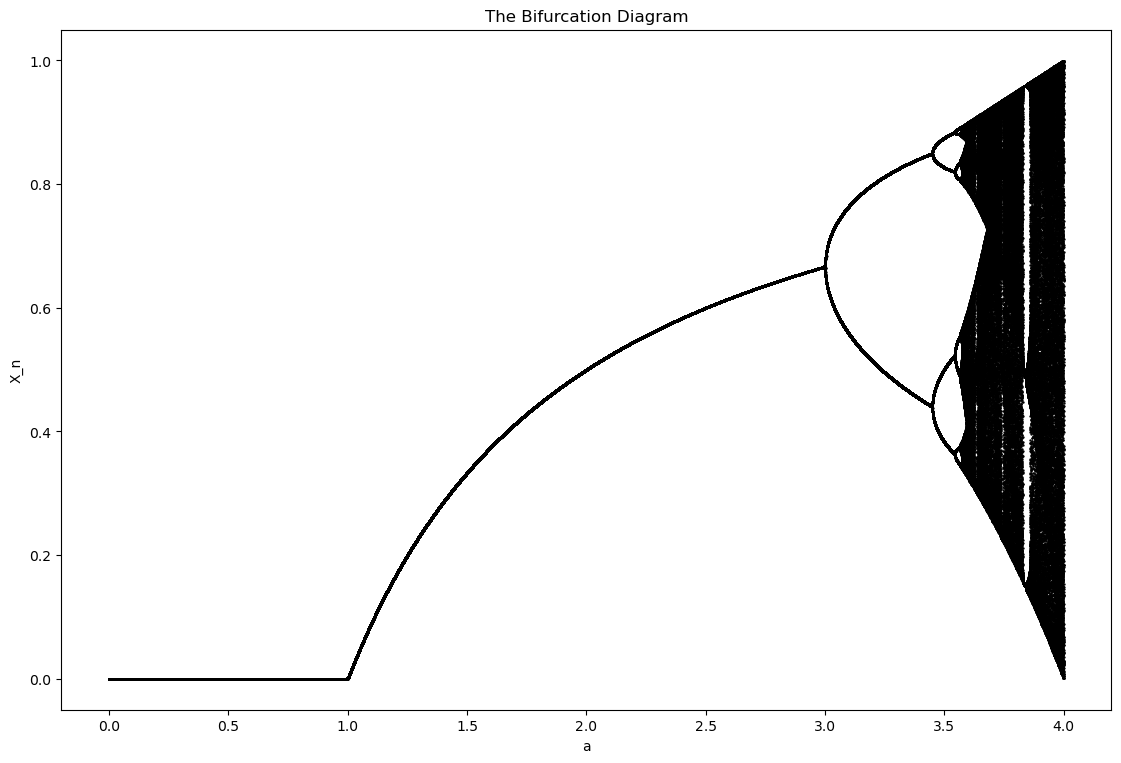

In [ ]:
# Assigns all variables values and equations to compute the graph
data_count = 1000000
map_count = 1000
start_time = time.time()
data_count_a, data_count_out = gen(data_count, map_count)
end_time = time.time()
elapsed_time_graph = end_time - start_time
print(elapsed_time_graph)

# Plotting the bifurcation diagram
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(bottom=0.20, left=0.2)
ax.scatter(data_count_a, data_count_out, s=.5, color='black')
ax.set_title('The Bifurcation Diagram')
ax.set_xlabel('a')
ax.set_ylabel('X_n')

Yipee! This graph looks great. Took a little longer than my 5 minutes alotted time, but 5.5-7 minutes is still good. This graph is the conclusion to the idea of F = ax(1-x), and it is very interesting to see. It is wild how such a complex mathmatical procedure and diagram can come from such a simple equation. The diagram does get across some important points. When a is from 0 to 1, the forumla acts like a normal parabolic equation. From 1 to 3, the equation resolves to fixed point stability. From 3 to 1+sqrt(6), there is period doubling, and then period doubling again at about 3.4. And it doubles again before eventually resorting to chaos. The little white sliver in the middle of the jumble of data points is a time of stability with a period 3. It is really interesting to see the phenomena of such a simple equation.

## The Basic Bisection Routine

### Bisection Module

<font color = blue>
Write your bisection routine as a function.  It should take, as inputs, a function (the function whose roots we are interested in), an initial bracketing, (that is, a pair $x_{\ell}$ and $x_r$), and a tolerance $\epsilon$ that specifies how close to zero the function should be before the module exits.

In [ ]:
# Allows me to input a function and bisect it later on
def func(x):
    return (x**3) - (np.pi * (x**2)) - (np.sqrt(2) * x) + 5

# Bisection takes the function and the end points and calculates the points where the function crosses the x-axis
def bisection(func, xl, xr, eps):
    xm = (xl + xr) / 2
    while np.absolute(func(xm)) > eps:
        if func(xl) * func(xm) > 0:
            xl = xm
        else:
            xr = xm
        xm = (xl + xr) / 2

    return xm

root = bisection(func, 1, 2, 1e-5)
print("Root:", root)

Root: 1.3109321594238281


### Simple Test

<font color = blue>
Test your code on the simple function

$$
f(x) = x^3 - \pi x^2 - \sqrt{2} x + 5
$$

Remember to plot it first, so that you know how to start your initial bracketing.  Find all three roots, using $\epsilon = 10^{-8}$.

First Root: -1.241498902440071
Second Root: 1.3109305910766125
Third Root: 3.0721609629690647


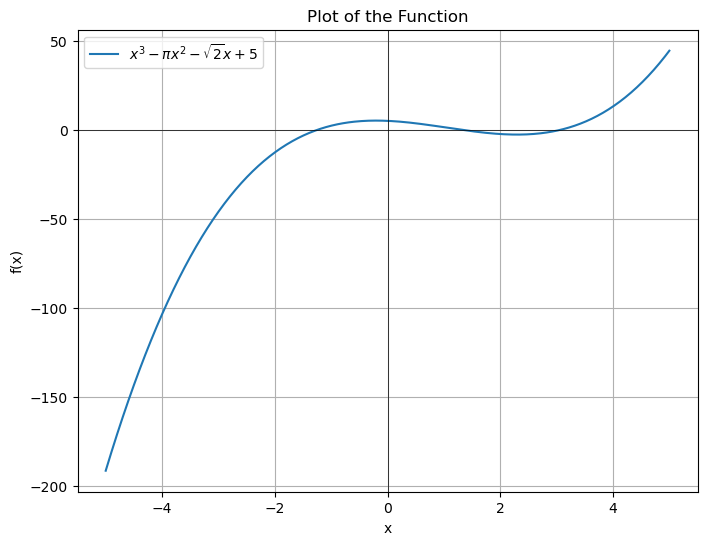

In [ ]:
# Assigns func to a new function given above
def func(x):
    return (x**3) - (np.pi * (x**2)) - (np.sqrt(2) * x) + 5

x = np.linspace(-5, 5, 400)
y = func(x)

print(f'First Root: {bisection(func, -2, 0, 1e-8)}')
print(f'Second Root: {bisection(func, 0, 2, 1e-8)}')
print(f'Third Root: {bisection(func, 2, 4, 1e-8)}')

# Plots the function and returns the roots
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$x^3 - \pi x^2 - \sqrt{2} x + 5$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Plot of the Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

## The Range Finder

<font color = blue>
In class we showed that the (dimensionless) range of a projectile $r(u, \theta_0)$ would satisfy the equation

$$
0 = \frac{ur(u\sin\theta_0 + 1)}{\cos\theta_0} + \ln\left[1 - \frac{ur}{\cos\theta_0}\right]
$$

where $\theta_0$ is the initial angle and $u$ is the ratio of initial speed to terminal velocity.

### Part 1: A Specific Angle and u-value

<font color = blue>
    
Find the value of the range $r$ for the angle $\theta_0 = \frac{\pi}{6}$ and the velocity $u = 0.01$.  Remember to plot the function you are trying to root-find first, so that you know how to start your initial bracketing.  **Discuss** how your result compares with what you would get in the drag-free case for the same initial angle.  Does this make sense?

First Root: -0.0001220703125
Second Root: 0.0001220703125


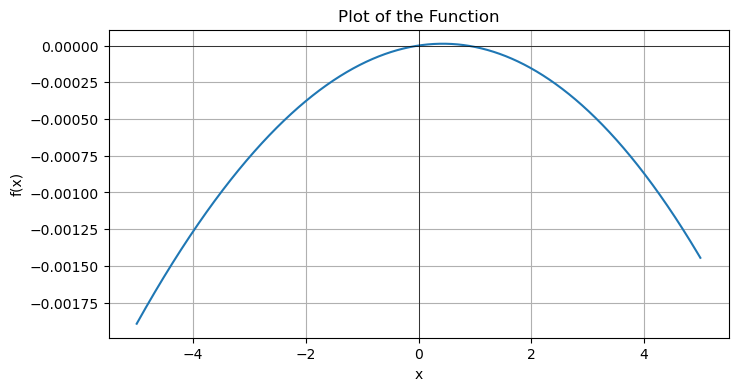

In [ ]:
# Assigns new function to func and add variables for theta and u
def func(x):
    theta = np.pi / 6
    u = 0.01
    return ((u * x * (u * np.sin(theta) + 1)) / (np.cos(theta))) + np.log(1 - ((u * x) / (np.cos(theta))))

x = np.linspace(-5, 5, 4000)
y = func(x)

print(f'First Root: {bisection(func, -1, 0, 1e-8)}')
print(f'Second Root: {bisection(func, 0, 2, 1e-8)}')

plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Plot of the Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

The curve is different than an example with no drag resistance because this parabola is not a perfect arc. You can see that it seems to be a bit lop-sided on the right side. This is because when drag is introduces the initial velocity is effected by the air resistance.

### Part 2: A Function of u and initial angle

<font color = blue>
Write a function that takes as inputs $\theta_0$ and $u$, and returns the range $r$.  

The hardest part of this is working out how to find the "initial bracketing".  Especially tricky is that the function you are root finding on is not well defined for all values of $r$: first you need to establish where the function "fails" and make sure that your bracketing avoids this.  **Discuss** how you solved this problem.

In [ ]:
def func_to_solve(r, theta, u):
    return ((u * r * (u * np.sin(theta) + 1)) / (np.cos(theta))) + np.log(1 - ((u * r) / (np.cos(theta))))

def find_bracket(func, step=0.1, max_range=100):
    xl, xr = -max_range, -max_range + step
    while xr <= max_range:
        if func(xl) * func(xr) < 0:
            return xl, xr
        xl, xr = xr, xr + step
    raise ValueError("Failed to find a valid bracket within the specified range")

def find_range_r(theta, u, eps=1e-6):
    def func_r(r):
        return func_to_solve(r, theta, u)

    xl, xr = find_bracket(func_r)  # Find valid interval [xl, xr]

    r = bisection(func_r, xl, xr, eps)

    return r

find_range_r(np.pi/6, .01, 1e-6)

0.012499999998595652

To solve this issue I added the function func() into the function find_range_r(). This allowed me to call the find range r function using the theta and u values I wanted and then again call the function func() using the r value that the function above solved for.

### * Part 3: Graphs

<font color = blue>
    
Use this function to make a single plot showing four curves: $r(\theta_0)$ vs. $\theta_0$ for $u = 0.5, 1.0, 2.0, 4.0$.  Let $\theta_0$ range from $0.01$ to $\frac{\pi}{2} - 0.01$ (as the endpoints are tricky).  Remember to label your plot thoroughly (including a legend), and **discuss** the results physically.

/var/folders/kh/9s_l3rg91_951phmfvtb4q6r0000gn/T/ipykernel_7874/3634750945.py:2: RuntimeWarning: invalid value encountered in log
  return ((u * r * (u * np.sin(theta) + 1)) / (np.cos(theta))) + np.log(1 - ((u * r) / (np.cos(theta))))


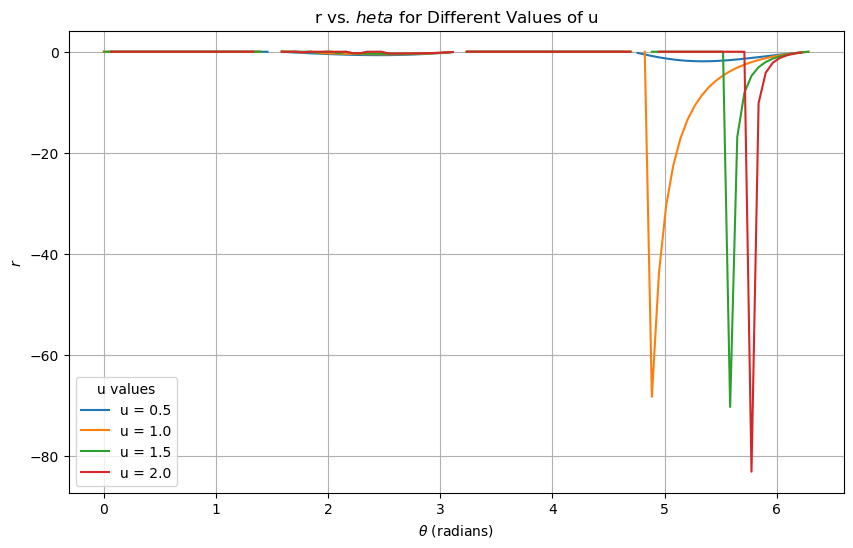

In [ ]:
# Values for u
u_values = [0.5, 1.0, 1.5, 2.0]

# Range for theta (0 to 2*pi)
theta_values = np.linspace(0, 2 * np.pi, 100)

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop over different values of u and calculate r for each theta
for u in u_values:
    r_values = []
    for theta in theta_values:
        try:
            r = find_range_r(theta, u)  # Compute r for the given theta and u
        except ValueError:
            r = np.nan  # If bracket not found, set r to NaN
        r_values.append(r)

    # Plot r vs theta for the current value of u
    plt.plot(theta_values, r_values, label=f'u = {u}')

# Plot settings
plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$r$')
plt.title('r vs. $\theta$ for Different Values of u')
plt.legend(title='u values')
plt.grid(True)

# Display plot
plt.show()

Using the different values of you the graph shows the angle in radians you would need to launch the projectile in order to get max distance. From the graph you can see that the u value of 2 launched at about 5.8 radians above the x-axis would be the way to get the farthest length projectile.

# Any Other Problem

<font color = blue>
    
Find a physical problem different from the ones discussed above that requires either a numerical root finder to complete.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and **discuss** their significance.

Theta: 5.73°, Range: 0.00 m, Target: 500 m
Theta: 84.27°, Range: 0.00 m, Target: 500 m
Root-finding problem: The function has the same sign at both bracketing points.


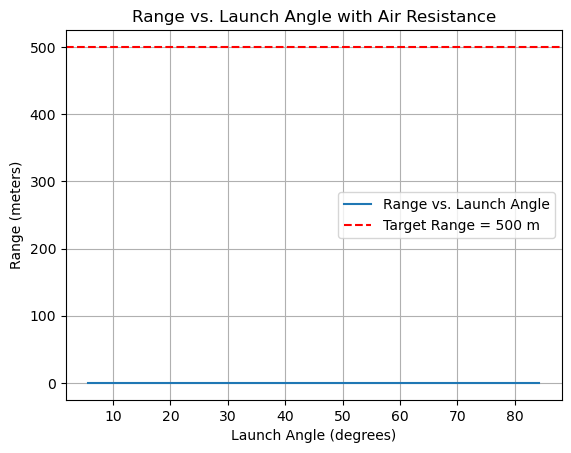

The solution did not converge.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
g = 9.81  # m/s^2 (gravity)
m = 0.1   # kg (mass of the projectile)
k = 0.05  # kg/s (drag coefficient)
v0 = 50   # m/s (initial speed) -- reduced for easier convergence
R_target = 500  # Target range in meters

# System of equations to model projectile motion with air resistance
def projectile_motion(y, t, theta):
    vx, vy, x, y_pos = y
    dvx_dt = -k/m * vx
    dvy_dt = -g - (k/m) * vy
    return [dvx_dt, dvy_dt, vx, vy]

# Function to compute range for a given launch angle theta
def compute_range(theta, max_time=10):
    # Initial conditions
    vx0 = v0 * np.cos(theta)  # Initial velocity in x-direction
    vy0 = v0 * np.sin(theta)  # Initial velocity in y-direction
    initial_conditions = [vx0, vy0, 0, 0]  # Initial values for [vx, vy, x, y]

    # Time array for numerical integration (dynamically adjusted)
    t = np.linspace(0, max_time, 1000)  # Time for the simulation

    # Solve the system of ODEs
    sol = odeint(projectile_motion, initial_conditions, t, args=(theta,))

    # Extract positions
    x = sol[:, 2]
    y = sol[:, 3]

    # Find the range (x-position where y crosses 0)
    idx = np.where(y <= 0)[0]
    if len(idx) > 0:
        range_val = x[idx[0]]  # The horizontal range where the projectile hits the ground
    else:
        # If the projectile doesn't hit the ground, return np.nan and extend the time
        return compute_range(theta, max_time=max_time + 10)  # Extend simulation time if needed

    return range_val

# Define the root-finding function
def f(theta):
    range_val = compute_range(theta)
    print(f"Theta: {np.degrees(theta):.2f}°, Range: {range_val:.2f} m, Target: {R_target} m")
    return range_val - R_target

# Bisection method with maximum iterations to avoid infinite loops
def bisection(func, xl, xr, eps, max_iter=100):
    iteration = 0
    while iteration < max_iter:
        xm = (xl + xr) / 2
        if np.abs(func(xm)) <= eps:
            return xm
        elif func(xl) * func(xm) > 0:
            xl = xm
        else:
            xr = xm
        iteration += 1
    raise ValueError("Bisection method did not converge within the maximum number of iterations")

# Set the range of angles to search for the root (launch angle in radians)
theta_left = 0.1  # Slightly above 0 to avoid singularity
theta_right = np.pi / 2 - 0.1  # Slightly below 90 degrees to avoid extreme cases

# Check the signs at the endpoints to ensure proper bracketing
if f(theta_left) * f(theta_right) > 0:
    print("Root-finding problem: The function has the same sign at both bracketing points.")
else:
    # Solve for the launch angle using the bisection method
    try:
        theta_solution = bisection(f, theta_left, theta_right, eps=1e-6)
        theta_degrees = np.degrees(theta_solution)  # Convert the solution to degrees
    except ValueError as e:
        print(e)
        theta_solution = None

# Plotting the results
theta_values = np.linspace(0.1, np.pi / 2 - 0.1, 100)
range_values = [compute_range(theta) for theta in theta_values]

plt.plot(np.degrees(theta_values), range_values, label="Range vs. Launch Angle")
plt.axhline(R_target, color='r', linestyle='--', label=f"Target Range = {R_target} m")
if theta_solution is not None:
    plt.axvline(theta_degrees, color='g', linestyle='--', label=f"Optimal Angle = {theta_degrees:.2f}°")

# Plot settings
plt.xlabel("Launch Angle (degrees)")
plt.ylabel("Range (meters)")
plt.title("Range vs. Launch Angle with Air Resistance")
plt.legend()
plt.grid(True)
plt.show()

# Print the solution if found
if theta_solution is not None:
    print(f"The optimal launch angle to achieve the target range of {R_target} meters is: {theta_degrees:.2f} degrees.")
else:
    print("The solution did not converge.")


The above program calculates and graphs the optimal angle for launching a projectile its max distance. It graphs launch angle vs. range. This program takes into account air resistance and drag.